In [121]:
import pandas as pd
import numpy as np

In [122]:
coverage_out = pd.read_csv('/ocean/projects/ees240006p/agomez3/intercomp/05.bwa/cds_coverage.tab',sep='\t')

coverage_out

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq
0,NODE_100000_length_536_cov_2.173737_g90271_i0.p1,1,534,71,534,100.0000,7.64232,35.9,48.50
1,NODE_100001_length_536_cov_2.173737_g90272_i0.p1,1,534,59,534,100.0000,7.49438,35.9,50.70
2,NODE_100002_length_536_cov_2.171717_g90273_i0.p1,1,534,111,534,100.0000,7.58240,35.7,32.80
3,NODE_100003_length_536_cov_2.155556_g90274_i0.p2,1,534,61,534,100.0000,6.25843,36.1,50.70
4,NODE_100004_length_536_cov_2.151515_g90275_i0.p2,1,492,59,492,100.0000,8.69919,36.2,51.80
...,...,...,...,...,...,...,...,...,...
226040,NODE_9999_length_1415_cov_12.907569_g7844_i0.p1,1,1158,346,1158,100.0000,23.09590,36.1,3.46
226041,NODE_999_length_2401_cov_4.529237_g720_i0.p1,1,2379,274,2379,100.0000,9.35561,36.0,59.10
226042,NODE_99_length_3725_cov_12.337676_g70_i0.p1,1,3579,714,3515,98.2118,14.89910,36.1,14.40
226043,NODE_9_length_6860_cov_35.490394_g5_i2.p1,1,6669,1628,6285,94.2420,19.31460,36.4,11.10


In [123]:
#Calculate reads per kilobase for each transcript
coverage_out['rpk'] = coverage_out['numreads']/(coverage_out['endpos']/1000)

#normalize RPK by sum all RPKs/1M=TPM

coverage_out['tpm']=coverage_out['rpk']/(coverage_out['rpk'].sum()/1000000)
coverage_out['log_tpm'] = np.log(coverage_out['tpm'])

/opt/packages/anaconda3-2022.10/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='coverage', ylabel='meandepth'>

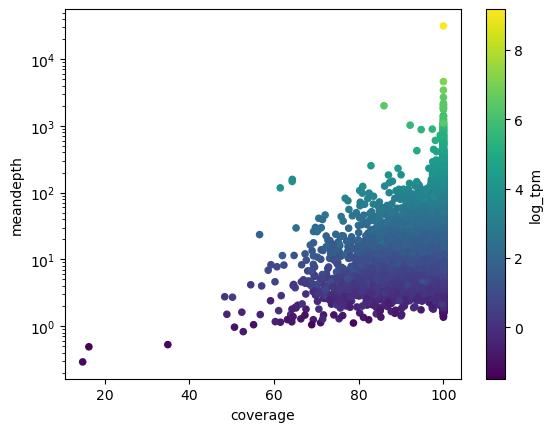

In [124]:
coverage_out.plot.scatter('coverage','meandepth',c='log_tpm',logy=True,cmap='viridis')

In [125]:
coverage_out.sort_values(by='tpm')

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,rpk,tpm,log_tpm
226044,NODE_25986_length_1001_cov_3.813542_g21268_i0.p2,1,312,0,0,0.0000,0.000000,0.0,0.0,0.000000,0.000000,-inf
128750,NODE_263463_length_324_cov_1.950530_g252968_i0.p1,1,282,3,46,16.3121,0.489362,34.6,40.7,10.638298,0.225467,-1.489580
215448,NODE_88133_length_571_cov_1.645283_g78787_i0.p1,1,489,6,337,68.9162,1.049080,36.2,36.7,12.269939,0.260048,-1.346888
142948,NODE_2839_length_2015_cov_7.824215_g2131_i1.p6,1,309,4,108,34.9515,0.527508,36.8,0.0,12.944984,0.274355,-1.293332
176883,NODE_46309_length_779_cov_5.978320_g12464_i1.p4,1,306,4,241,78.7582,1.111110,36.5,0.0,13.071895,0.277045,-1.283576
...,...,...,...,...,...,...,...,...,...,...,...,...
56833,NODE_167303_length_411_cov_18.443243_g156904_i...,1,360,14103,360,100.0000,2068.510000,35.9,38.6,39175.000000,830.272270,6.721754
34160,NODE_139684_length_452_cov_3287.430657_g129424...,1,450,19333,450,100.0000,3438.900000,35.2,1.5,42962.222222,910.538399,6.814036
25111,NODE_128951_length_471_cov_2072.681395_g118789...,1,336,19235,336,100.0000,4607.580000,36.2,43.7,57247.023810,1213.289506,7.101091
175278,NODE_44620_length_792_cov_5.243675_g37819_i0.p1,1,531,36290,531,100.0000,2104.630000,35.4,59.8,68342.749529,1448.451558,7.278250


In [126]:
coverage_out.set_index('#rname',inplace=True)

In [127]:
eggnog_out = pd.read_csv('/ocean/projects/ees240006p/agomez3/intercomp/07.eggnog_mapper/emapper.annotations',sep='\t').drop([100609,100610,100611])

In [128]:
eggnog_out.set_index('query',inplace=True)
eggnog_out

,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
query,,,,,,,,,,,,,,,,,,,,
NODE_100001_length_536_cov_2.173737_g90272_i0.p1,2880.D8LQJ0,1.100000e-39,146.0,"28IEG@1|root,2QQR7@2759|Eukaryota",2759|Eukaryota,S,sperm axoneme assembly,IQCG,"GO:0000003,GO:0000226,GO:0001578,GO:0002177,GO...",-,-,-,-,-,-,-,-,-,-,IQ
NODE_100004_length_536_cov_2.151515_g90275_i0.p2,3847.GLYMA15G02610.1,2.300000e-15,76.3,"KOG3412@1|root,KOG3412@2759|Eukaryota,37TQZ@33...",35493|Streptophyta,J,60S ribosomal Protein,-,"GO:0003674,GO:0003735,GO:0005198,GO:0005575,GO...",-,ko:K02903,"ko03010,map03010",M00177,-,-,"br01610,ko00000,ko00001,ko00002,ko03011",-,-,-,Ribosomal_L28e
NODE_100006_length_536_cov_2.149495_g90277_i0.p1,5762.XP_002683557.1,2.050000e-08,60.5,"COG2453@1|root,KOG1716@2759|Eukaryota",2759|Eukaryota,T,protein tyrosine/serine/threonine phosphatase ...,-,-,"3.1.3.16,3.1.3.48","ko:K04459,ko:K14819,ko:K20216,ko:K21278","ko04010,ko04013,ko04214,ko04726,ko05418,map040...",-,-,-,"ko00000,ko00001,ko01000,ko01009,ko03009",-,-,-,"DSPc,FYVE,Rhodanese"
NODE_100008_length_536_cov_2.125253_g90279_i0.p1,44056.XP_009033785.1,3.750000e-61,201.0,"KOG0674@1|root,KOG0674@2759|Eukaryota",2759|Eukaryota,O,unfolded protein binding,CALR,"GO:0000003,GO:0000122,GO:0001669,GO:0001846,GO...",-,"ko:K08057,ko:K10098","ko04141,ko04145,ko04612,ko05142,ko05166,map041...",-,-,-,"ko00000,ko00001,ko03110,ko04091",-,-,-,Calreticulin
NODE_10000_length_1415_cov_11.728530_g7845_i0.p1,946362.XP_004989460.1,5.590000e-25,112.0,"COG1601@1|root,KOG2767@2759|Eukaryota,38DWM@33...",33154|Opisthokonta,J,Eukaryotic translation initiation factor 5,EIF5,"GO:0000122,GO:0001731,GO:0001732,GO:0002181,GO...",-,ko:K03262,"ko03013,ko04214,map03013,map04214",-,-,-,"ko00000,ko00001,ko03012",-,-,-,"W2,eIF-5_eIF-2B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NODE_99998_length_536_cov_2.226263_g90269_i0.p1,6500.XP_005101738.1,6.610000e-30,122.0,"COG4631@1|root,KOG0430@2759|Eukaryota,38GEI@33...",33208|Metazoa,F,molybdopterin cofactor binding,XDH,"GO:0000166,GO:0000302,GO:0001932,GO:0001933,GO...","1.17.1.4,1.17.3.2,1.2.3.1","ko:K00106,ko:K00157","ko00230,ko00232,ko00280,ko00350,ko00380,ko0075...",M00546,"R01709,R01768,R01769,R02103,R02107,R02125,R026...","RC00075,RC00080,RC00143,RC00218,RC00242,RC0107...","ko00000,ko00001,ko00002,ko01000,ko04147",-,-,-,"Ald_Xan_dh_C,Ald_Xan_dh_C2,CO_deh_flav_C,FAD_b..."
NODE_9999_length_1415_cov_12.907569_g7844_i0.p1,112098.XP_008609508.1,2.020000e-22,104.0,"2CGXK@1|root,2QS0S@2759|Eukaryota",2759|Eukaryota,S,myosin light chain binding,SPATA17,"GO:0003674,GO:0005488,GO:0005515,GO:0008092,GO...",-,ko:K08515,"ko04130,map04130",-,-,-,"ko00000,ko00001,ko04131,ko04147",-,-,-,IQ
NODE_999_length_2401_cov_4.529237_g720_i0.p1,877455.Metbo_1958,3.030000e-05,57.0,"COG1520@1|root,COG3291@1|root,arCOG02487@1|roo...",2157|Archaea,E,"Polymorphic membrane protein, Chlamydia",-,-,-,-,-,-,-,-,-,-,-,-,"Big_3_5,Big_5,CBM_6,CHB_HEX_C_1,NosD,PKD,PQQ_3..."


In [129]:
eukulele_out = pd.read_csv('/ocean/projects/ees240006p/agomez3/intercomp/06.eukulele/out/taxonomy_estimation/transcripts-estimated-taxonomy.out',sep='\t',index_col=1)
eukulele_out = eukulele_out[~eukulele_out.index.duplicated(keep='first')]

In [136]:
eukulele_out

,Unnamed: 0,classification_level,full_classification,classification,max_pid,ambiguous,counts
transcript_name,,,,,,,
NODE_100000_length_536_cov_2.173737_g90271_i0.p1,0,class,Eukaryota; Alveolata; Dinoflagellata; Dinophyceae,Dinophyceae,65.5,0,NaN
NODE_100001_length_536_cov_2.173737_g90272_i0.p1,0,genus,Eukaryota; Alveolata; Dinoflagellata; Dinophyc...,Amphidinium,269.2,0,NaN
NODE_100004_length_536_cov_2.151515_g90275_i0.p2,0,order,Eukaryota; Alveolata; Dinoflagellata; Dinophyc...,Suessiales,153.7,0,NaN
NODE_100006_length_536_cov_2.149495_g90277_i0.p1,0,order,Eukaryota; Alveolata; Dinoflagellata; Dinophyc...,Peridiniales,214.2,0,NaN
NODE_100008_length_536_cov_2.125253_g90279_i0.p1,0,family,Eukaryota; Alveolata; Dinoflagellata; Dinophyc...,Goniodomataceae,209.9,0,NaN
...,...,...,...,...,...,...,...
NODE_99998_length_536_cov_2.226263_g90269_i0.p1,0,order,Eukaryota; Alveolata; Dinoflagellata; Dinophyc...,Suessiales,209.1,0,NaN
NODE_9999_length_1415_cov_12.907569_g7844_i0.p1,0,class,Eukaryota; Alveolata; Dinoflagellata; Oxyrrhea,Oxyrrhea,309.3,0,NaN
NODE_999_length_2401_cov_4.529237_g720_i0.p1,0,order,Eukaryota; Archaeplastida; Chlorophyta; Mamiel...,Mamiellales,1028.5,0,NaN


In [130]:
final_count_table = pd.DataFrame(index = coverage_out.index.values,columns = ['Protein_Length','TPM','Eukulele_classification','Eukulele_full_classification','Classification_level','Eggnog_Function','Eggnog_e_value','KEGG_ko'])

In [131]:
final_count_table['Protein_Length']=coverage_out['endpos']
final_count_table['TPM']=coverage_out['tpm']
final_count_table['Eukulele_classification']=eukulele_out['classification']
final_count_table['Eukulele_full_classification']=eukulele_out['full_classification']
final_count_table['Classification_level']=eukulele_out['classification_level']
final_count_table['Eggnog_Function'] = eggnog_out['Description']
final_count_table['Eggnog_e_value'] = eggnog_out['evalue']
final_count_table['KEGG_ko'] = eggnog_out['KEGG_ko']

In [138]:
final_count_table.to_csv('/ocean/projects/ees240006p/agomez3/intercomp/counts_tax_function.csv')